## 4.9 Intro to Data Visualization with Python - Part 2

### 1. Import Libraries
### 2. Import Data Frame
### 3. Create a Bar Charts & Histogram - "Order_Hour_of_day"
### 4. Create Bar Chart - "Loyalty-Flag"
### 5. Create a Line Chart - "order_hour_of_day","price"
### 6. Creating a line chart exploring the connections between "Age" and "n_dependents"
### 7.  Create a scatterplot for the connection between "Age" and "Income"

## 1. Import Libraries

In [1]:
## import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## 2. Import Data Frame

In [2]:
## Import data frame

path = r'/Users/eriseldabaci/Desktop/CareerFoundry/Python Fundamentals for Data Analysts/Instacart Basket Analysis'

In [3]:
path

'/Users/eriseldabaci/Desktop/CareerFoundry/Python Fundamentals for Data Analysts/Instacart Basket Analysis'

In [4]:
df_ords_prods_custmrs = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data ', 'orders_products_combined_customers_update_3.pkl'))

In [5]:
df_ords_prods_custmrs.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,ordering_behavior,order_frequency,Name,Surname,Gender,State,Age,date_joined,n_dependants,Income
0,2539329,1,1,2,8,NaN,True,196.0,1.0,0.0,...,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,40423
1,2398795,1,2,3,7,15.0,False,196.0,1.0,1.0,...,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,40423
2,473747,1,3,3,12,21.0,False,196.0,1.0,1.0,...,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,40423
3,2254736,1,4,4,7,29.0,False,196.0,1.0,1.0,...,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,40423
4,431534,1,5,4,15,28.0,False,196.0,1.0,1.0,...,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,40423


In [6]:
df_ords_prods_custmrs.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'new_customer',
       'product_id', 'add_to_cart_order', 'reordered', '_merge',
       'product_name', 'aisle_id', 'department_id', 'prices',
       'price_range_loc', 'Busiest day', 'Busyness_Level', 'Busiest days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'average_price',
       'spending_flag', 'ordering_behavior', 'order_frequency', 'Name',
       'Surname', 'Gender', 'State', 'Age', 'date_joined', 'n_dependants',
       'Income'],
      dtype='object')

## 3. Create a Bar Charts & Histogram - "Order_Hour_of_day"

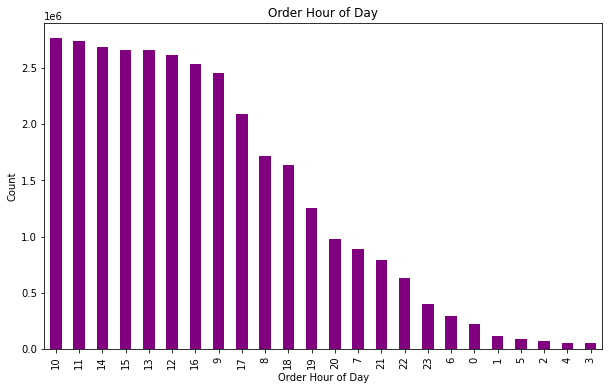

In [7]:
## Create Bar Chart - "Order_Hour_Of_Day"

bar = df_ords_prods_custmrs['order_hour_of_day'].value_counts().plot.bar(color='purple', title='Order Hour of Day', figsize=(10, 6))
plt.xlabel('Order Hour of Day')
plt.ylabel('Count')

#3 Export Bar chart

bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_order_hour_of_day.png'))

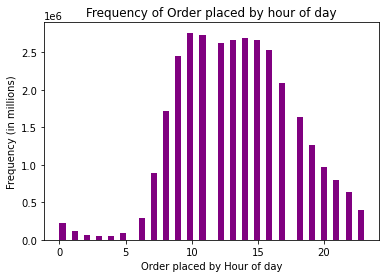

In [8]:
## Create Histogram - "Order_Hour_Of_Day"


hist_order_hour_of_day = df_ords_prods_custmrs['order_hour_of_day'].plot.hist(bins = 50, color = 'purple')

plt.xlabel('Order placed by Hour of day')
plt.ylabel('Frequency (in millions)')
plt.title('Frequency of Order placed by hour of day')

## Export Histogram
hist_order_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour_of_day.png'))


### The busiest hours of day are between 10AM-16AM as we can see in both charts.

## 4. Create Bar Chart - "Loyalty-Flag"

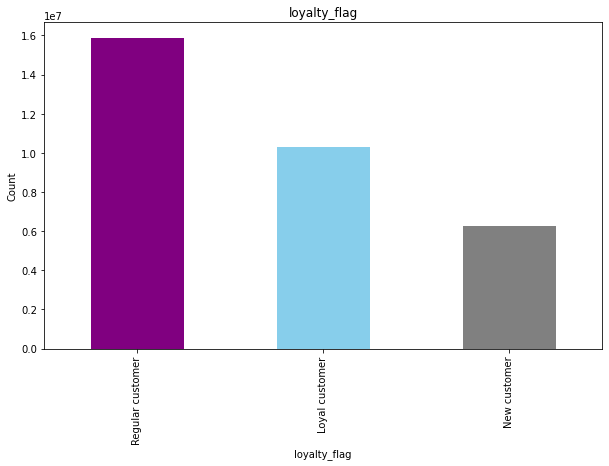

In [51]:
## Create a bar chart from the “loyalty_flag” column and Export It

bar = df_ords_prods_custmrs['loyalty_flag'].value_counts().plot.bar(color=['purple','skyblue','gray'], title='loyalty_flag', figsize=(10, 6))
plt.xlabel('loyalty_flag')
plt.ylabel('Count')

## Export Bar Chart - Loyalty_Flag

bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

## 5. Create a Line Chart - "order_hour_of_day","price"

In [52]:
## Create a list holding True/False values to the test np.random.rand() <= 0.8
np.random.seed(4)
dev = np.random.rand(len(df_ords_prods_custmrs)) <= 0.8

In [53]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [54]:
## Split dataframe into two samples: 70% of the sample in the dataframe big + 30% of the sample in the dataframe small

big = df_ords_prods_custmrs[dev]
small = df_ords_prods_custmrs[~dev]

In [55]:
## Check the length for all data frame

len(df_ords_prods_custmrs)

32404859

In [56]:
## Check the length for big and small datata frame

len(big) + len(small)

32404859

In [57]:
## Select the necessary columns for the analyze

df_2 = small[['order_hour_of_day','prices']]

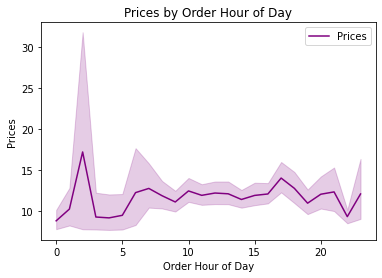

In [58]:
## Create line chart

line = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices', color = 'purple', label='Prices')
line.set_title("Prices by Order Hour of Day")
line.set_xlabel("Order Hour of Day")
line.set_ylabel("Prices")

plt.legend()
plt.show()

## Export Line Chart - Prices- order Hour OF Day

line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_order_hour_of_day.png'))

## 6. Creating a line chart exploring the connections between "Age" and "n_dependents"

In [59]:
##Select the necessary columns for the analyze

df_age_dependats = small[['Age','n_dependants']]

In [60]:
df_age_dependats.head()

,Age,n_dependants
0,31,3
2,31,3
6,31,3
12,31,3
13,31,3


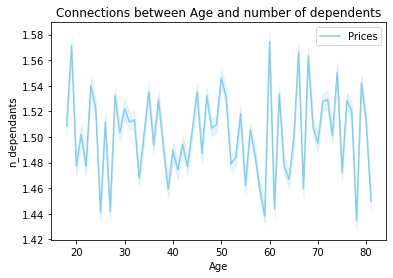

In [61]:
## Create line chart

line = sns.lineplot(data = df_age_dependats, x = 'Age',y = 'n_dependants', color = 'skyblue', label='Prices')
line.set_title("Connections between Age and number of dependents")
line.set_xlabel("Age")
line.set_ylabel("n_dependants")

plt.legend()
plt.show()

## Export Line Chart - Prices- order Hour OF Day

line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_n_dependants.png'))

## 7.  Create a scatterplot for the connection between "Age" and "Income"

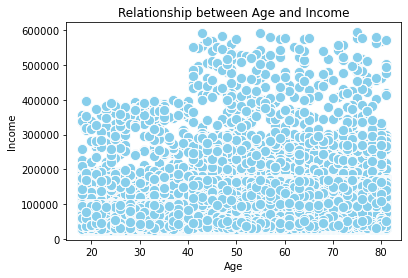

In [62]:
## Create Scatterplot

scatterplot = sns.scatterplot(x = 'Age', y = 'Income',data = df_ords_prods_custmrs, color = 'skyblue', s = 100)

plt.title("Relationship between Age and Income")
plt.xlabel("Age")
plt.ylabel("Income")
plt.show()


## Export Scatterplot

scatterplot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations',"scatterplot.png"))